In [ ]:
- title: Занятие 12
- author: Vitalii Zavadskyi
- date: 2024-11-18
- slug: 2024_lpr_lab12
- ipynb_url: download/2024_lpr_lab12.ipynb

# Лабораторное занятие 12

## Введение в "машинное обучение"

Машинное обучение (ML) — это наука, изучающая алгоритмы, автоматически улучшающиеся благодаря опыту. © Яндекс.Образование

Основная задача ML: подобрать алгоритм (модель), которая решала бы соотвествующую задачу на определенном наборе данных. Часто набор данных ограничен и не содержит всех возможных вариаций, но в этом и состоит "магия" машинного обучения — иметь возможность ответить на поставленный вопрос почти для любого набора данных при настройке алгоритма на ограниченных данных

Среди задач ML можно выделить следующие (первые две мы рассмотрим в данной лабораторной работе):
- Задачи регрессии (определение числового параметра по совокупности характеристик объекта)
- Задачи классификации (определение принадлежности объекта к опрределенному классу)
- Задача класстеризации (разбиение выборки на непересекающиеся группы)
- Задача поиска аномалий
- и т.д.

Задачей регрессии может быть предсказание цены на недвижимость при наличии информации о расположении недвижимости, доступности транспорта и т.д.

Задача классификации — определение наличия болезни у пациента по его физическим параметрам.

Для обучения алгоритмов используется несколько основных подходов:
- Обучение с учителем/supervised learning (предоставляется набор размеченных данных)
- Обучение без учителя/unsupervised learning (набор данных не содержит информации о классах, целевых значениях)
- Обучение с подкреплением/reinforcement learning (алгоритм обучается на данных за "награду")

В этой лабораторной работе мы познакомимся с ML на языке Python с помощью библиотеки scikit-learn `sklearn`.

Библиотека scikit-learn содержит множество моделей. На этом семинаре мы познакомимся с моделями для обучения с учителем: `KNeighborsClassifier` и `DecisionTreeClassifier`

## Метод k-ближайших соседей

Рассмотрим модель k-ближайших соседей (k-nearest neighbors kNN). Интуитивное понимание модели — для выбранного набора данных можно вычислить расстояние между точками. Принадлежность точки к определенному классу определяется "голосованием" k ближайших соседей. Чаще всего k нечетное (*почему же?*)

Анимация для объяснения метода kNN: [ссылка](https://machinelearningknowledge.ai/wp-content/uploads/2021/07/Sklearn-KNN-Classifier.gif)

Здесь оставим наглядную картинку

![image]( 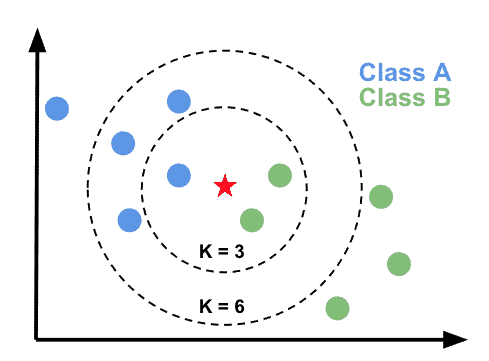)

Расстояние между точками признаков можно считать различными способами: как в евклидовом пространстве, так и косинусоидальной метрикой. Выбор метрики зависит от решаемой задачи.

Метод kNN можно использовать для решения задач регрессии и классфификации. На текущий момент рассмотрим ее использование для задачи бинарной (всего два возможных состояния) классфикации на примере искуственных данных.

Сгенерируем пары точек на двумерной плоскости

In [1]:
import numpy as np


np.random.seed(1)
n_samples = 1000

X = np.random.rand(n_samples, 2) * 2.5 - 1.25

Определим такие точки, которые лежат внутри окружности радиуса 1

In [2]:
y = (X**2).sum(axis=1) < 1

Отобразим получившиеся данные

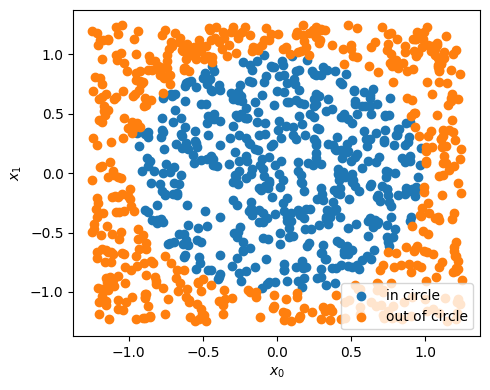

In [3]:
from matplotlib import pyplot as plt

plt.figure(figsize=(5, 4))
plt.scatter(X[y, 0], X[y, 1], label="in circle")
plt.scatter(X[~y, 0], X[~y, 1], label="out of circle")
plt.legend()
plt.xlabel(r"$x_0$")
plt.ylabel(r"$x_1$")
plt.tight_layout()

Составим из набора точек и меток таблицу

In [4]:
import pandas as pd

df = pd.DataFrame(np.vstack((X.T, y)).T, columns=["x0", "x1", "target"])

df.head()

,x0,x1,target
0,-0.207445,0.550811,1.0
1,-1.249714,-0.494169,0.0
2,-0.883110,-1.019154,0.0
3,-0.784349,-0.386098,1.0
4,-0.258081,0.097042,1.0


Каждая строка данных описывается 2 признаками. Каждой строке данных из переменной `X` соответствует свое значение из `y`.

Попробуем нарисовать рраспределения признаков

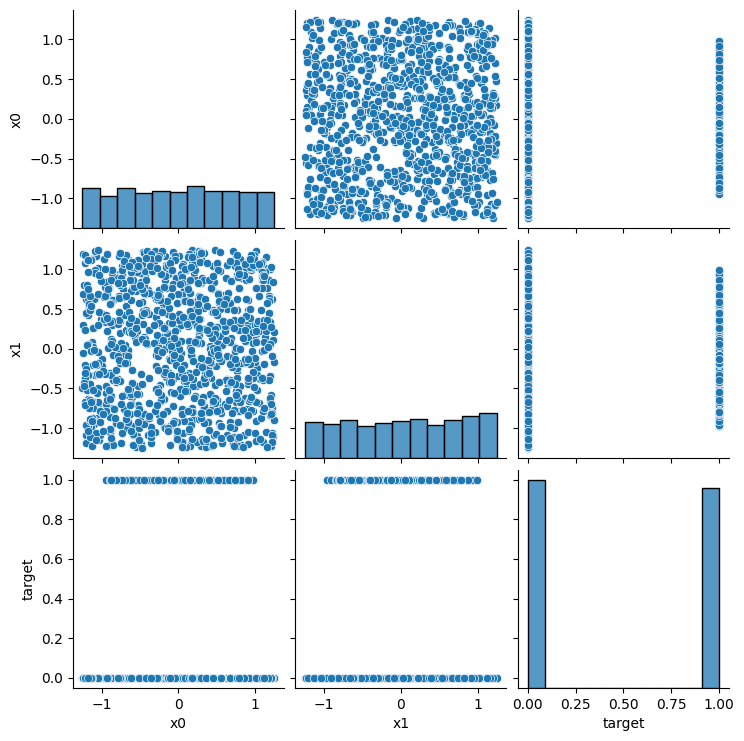

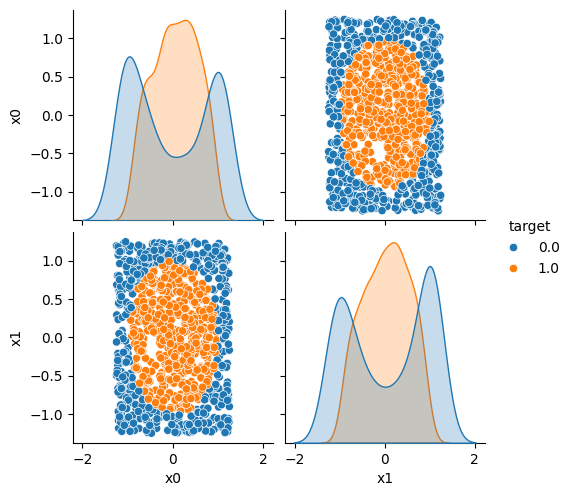

In [5]:
import seaborn as sns

sns.pairplot(df);
sns.pairplot(df, hue="target");

По  распредеелниям можно точно утверждать, что выборка является сбалансрованной (одинаковое количество точек в кругу и вне). Координаты точек в окружности скорее всего будут распределены более узко вокруг 0 (обратите внимание на гистограммы во второй группе графиков)

Построим коррреляционную матрицу:

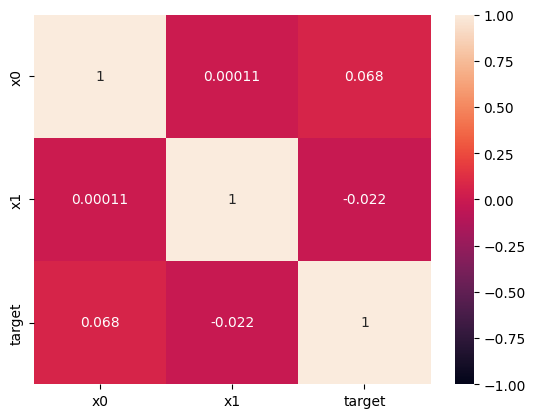

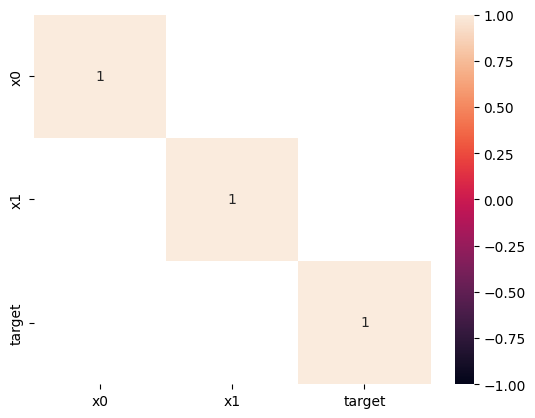

In [6]:
correlation_df = df.corr()
sns.heatmap(correlation_df, vmin=-1, vmax=1, annot=True)
plt.figure()
sns.heatmap(correlation_df[np.abs(correlation_df) > 0.75], vmin=-1, vmax=1, annot=True);

По виду матрицы нельзя сказать о наличии корреляций между параметрами.

## Разбиение данных на выборки

Стоит задаться вопросом: а как проверить качество модели после обучения?

Для этого набор данных разделяется на тренировочную и тестовую выборки (и еще более редко на третью выборку — валидационную)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Мы зафиксировали процесс разделения набора данных на тренировочную и тестовую выборки с помощью параметра `random_state`.

**Упражнение 1**. Изобразите на двумерной плоскости тренировочную и тестовую выборки (с помощью разных цветов) и не забудьте отметить принадлежность точки к определенному классу (с помощью разной формы `facecolor="None"`).

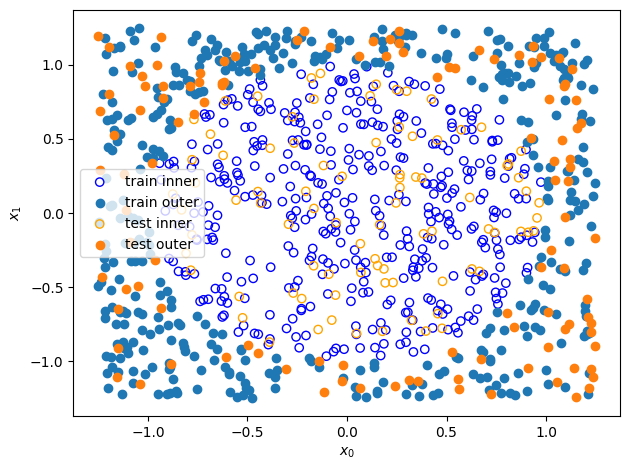

In [9]:
plt.scatter(X_train[y_train, 0], X_train[y_train, 1], edgecolors="b", facecolors="none").set_label("train inner")
plt.scatter(X_train[~y_train, 0], X_train[~y_train, 1]).set_label("train outer")
plt.scatter(X_test[y_test, 0], X_test[y_test, 1], edgecolors="orange", facecolors="none").set_label("test inner")
plt.scatter(X_test[~y_test, 0], X_test[~y_test, 1]).set_label("test outer")
plt.legend()

plt.xlabel(r"$x_0$")
plt.ylabel(r"$x_1$")
plt.tight_layout()

Теперь же обратися к классу `KNeighborsClassifier`. Он реализует метод kNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5, metric="euclidean")

У модели есть параметр `n_neighbors`. Он отвечает за количество соседей, которые используется при оценке параметра.

Еще интересным параметром является `metric`. Он определяет каким образом вычисляется расстояние между точками. Приведем несколько определений для метрики расстояния:
- `euclidean` $$ \rho(x, y) = \sqrt{\sum\limits_{i = 1}^{N}\left(x_i - y_i\right)^2}$$
- `manhattan` $$ \rho(x, y) = \sum\limits_{i = 1}^{N}|x_i - y_i|$$
- `minkowski` $$ \rho(x, y) = \left(\sum\limits_{i = 1}^{N}\left(x_i - y_i\right)^p\right)^{1 / p}, p \in (0, 1)$$

Попробуем обучить нашу модель

In [11]:
model_knn.fit(X=X_train, y=y_train)

KNeighborsClassifier(metric='euclidean')

Теперь можно предсказать значение целевого параметра на тренировочной выборке данных

In [12]:
y_pred = model_knn.predict(X_test)

Определим качество работы нашей модели. Это можно сделать с помощью `confusion_matrix` и `accuracy_score`
- `confusion_matrix` возвращает матрицу несоотвествия (матрицу ошибок); значение в $ij$-элементе соотвествует количеству элементов, которые пренадлежат группе $i$ и были отмечены как элементы группы $j$. Для случая бинарной классификации:
$$\begin{pmatrix} \text{True positive}\ (\mathrm{TP}) & \text{False positive}\ \mathrm{(FP)} \\ \text{False negative}\ \mathrm{(FN)} & \text{True negative}\ (\mathrm{TN}) \\ \end{pmatrix}$$
- `accuracy_score` соотвествует доле правильно предсказаных меток $$ \dfrac{\mathrm{TP} + \mathrm{TN}}{\mathrm{TP} + \mathrm{TN} + \mathrm{FP} + \mathrm{FN}} $$

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix

knn_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
knn_confussion_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

print(f"Accuracy of kNN: {knn_accuracy}")
print(f"Confussion matrix of kNN:\n {knn_confussion_matrix}")

Accuracy of kNN: 0.97
Confussion matrix of kNN:
 [[110   4]
 [  2  84]]


Дополнительно вводятся метрики качества `precision` и `recall`
- `precision` доля релевантных объектов среди извлеченных
$$ \mathrm{precision} = \dfrac{\mathrm{TP}}{\mathrm{TP} + \mathrm{FP}} $$
- `recall` доля релевантных объектов, которые были извлечены
$$ \mathrm{recall} = \dfrac{\mathrm{TP}}{\mathrm{TP} + \mathrm{FN}} $$

**Упражнение 1.5**. Вычислите `precision` и `recall` для вышеопределенной модели

In [15]:
from sklearn.metrics import precision_score, recall_score
knn_precision = precision_score(y_true=y_test, y_pred=y_pred)
knn_recall = recall_score(y_true=y_test, y_pred=y_pred)
print(f"precision of kNN: {knn_precision}")
print(f"recall of kNN: {knn_recall}")

precision of kNN: 0.9545454545454546
recall of kNN: 0.9767441860465116


Мы получили очень хорошее значение точности для нашей модели. Можем ли мы получить больше? Конечно, ~~если откинем метод kNN и просто начертим окружность радиуса 1~~!

Давайте попробуем оптимизировать количество соседей

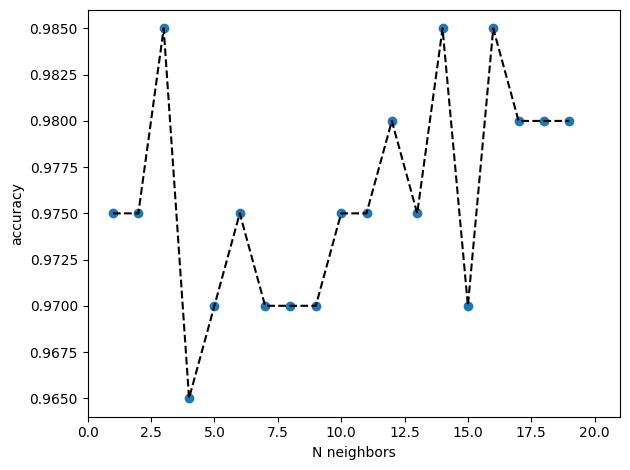

In [16]:
accuracies_knn = []
for n_neighbors in range(1, 20):
    model_knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric="euclidean")
    model_knn.fit(X_train, y_train)

    accuracies_knn.append(accuracy_score(model_knn.predict(X_test), y_test))

plt.plot(range(1, 20), accuracies_knn, linestyle="--", color="black")
plt.scatter(range(1, 20), accuracies_knn)
plt.xlim((0, 21))
plt.xlabel("N neighbors")
plt.ylabel("accuracy")
plt.tight_layout()

По графику можно сказать: 3 соседа является оптимальным выбором.

**Упражнение 2**. Попробуйте найти оптимальный выбор параметра `metric` для класса `KNeighborsClassifier` в данной задаче

c:\Users\kleme\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
c:\Users\kleme\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
c:\Users\kleme\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
c:\Users\kleme\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
 

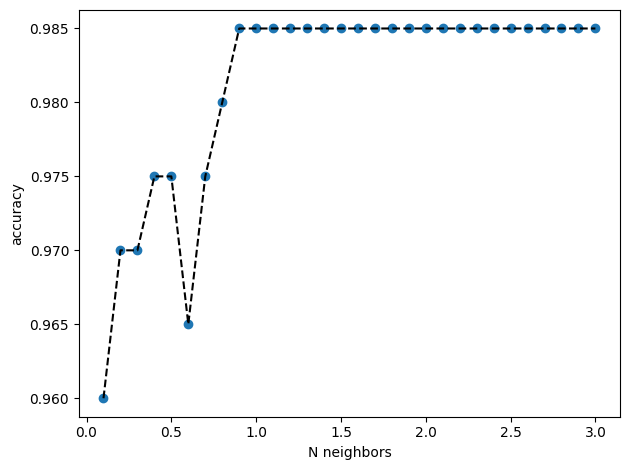

In [17]:
accuracies_knn = []
for p in np.arange(0.1, 3.1, 0.1):
    model_knn = KNeighborsClassifier(n_neighbors=3, p=p)
    model_knn.fit(X_train, y_train)
    accuracies_knn.append(accuracy_score(model_knn.predict(X_test), y_test))

plt.plot(np.arange(0.1, 3.1, 0.1), accuracies_knn, linestyle="--", color="black")
plt.scatter(np.arange(0.1, 3.1, 0.1), accuracies_knn)
plt.xlabel("N neighbors")
plt.ylabel("accuracy")
plt.tight_layout()

Давайте попробуем проанализировать данные с использованием только одного признака: расстояние от центра до выбранной точки

In [18]:
df["r"] = df["x0"]**2 + df["x1"]**2

X = df["r"].to_numpy().reshape((-1, 1))
y = df["target"].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model_knn = KNeighborsClassifier(n_neighbors=3, metric="euclidean")
model_knn.fit(X=X_train, y=y_train)
y_pred = model_knn.predict(X_test)

knn_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
knn_confussion_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

print(f"Accuracy of kNN: {knn_accuracy}")
print(f"Confussion matrix of kNN:\n {knn_confussion_matrix}")

Accuracy of kNN: 1.0
Confussion matrix of kNN:
 [[114   0]
 [  0  86]]


Получили идеальный классификатор. Но всегда ли он будет таким идеальным? Можем это проверить с помощью механизма кросс-валидации

In [19]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=None, shuffle=True)

X = df["r"].to_numpy().reshape((-1, 1))
y = df["target"].to_numpy()

model_cv = KNeighborsClassifier(n_neighbors=3, metric="euclidean")

cv_res = cross_validate(
    model_cv,
    X,
    y,
    scoring="accuracy",
    cv=kf,
)

print(f"Test accuracy are {cv_res['test_score']}")
print(f"Mean accuracy = {cv_res['test_score'].mean()}")

Test accuracy are [0.99  1.    1.    1.    0.995]
Mean accuracy = 0.9970000000000001


**Упражнение 3**. Проведите кросс-валидацию для модели kNN, которая обучается на паре параметров $x_0$ и $x_1$. Сравните результат с предыдущей моделью, которая обучается на одном параметре

In [20]:
kf = KFold(n_splits=5, random_state=None, shuffle=True)
X = np.array([df["x0"], df["x1"]]).T
y = df["target"].to_numpy()
model_cv = KNeighborsClassifier(n_neighbors=3, metric="euclidean")
cv_res = cross_validate(model_cv, X, y, scoring="accuracy", cv=kf)
print(f"Test accuracy are {cv_res['test_score']}")
print(f"Mean accuracy = {cv_res['test_score'].mean()}")

Test accuracy are [0.995 0.955 0.985 0.98  0.985]
Mean accuracy = 0.9800000000000001


Если с примером про окружность все понятно, то можно приступить к набору данных с большим количеством признаков. Сгенерируем такие псевдоданные с помощью `make_classification`

In [21]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1000,
    n_features=6,
    n_classes=2,
    n_repeated=1,
    n_redundant=1,
    random_state=2,
)

df = pd.DataFrame(np.vstack((X.T, y)).T, columns=["x0", "x1", "x2", "x3", "x4", "x5", "target"])

df.head()

,x0,x1,x2,x3,x4,x5,target
0,-0.070035,1.006728,1.992567,1.545391,1.992567,0.843520,0.0
1,0.883467,0.714652,1.215424,0.795972,1.215424,-0.406246,1.0
2,0.506578,-0.445396,-0.982998,0.837789,-0.982998,0.710466,1.0
3,-1.039690,-0.646307,-1.047843,-1.045372,-1.047843,0.189569,0.0
4,-0.265684,0.814057,1.655815,1.495793,1.655815,-0.307948,0.0


Построим распределение признаков и корреляционную матрицу

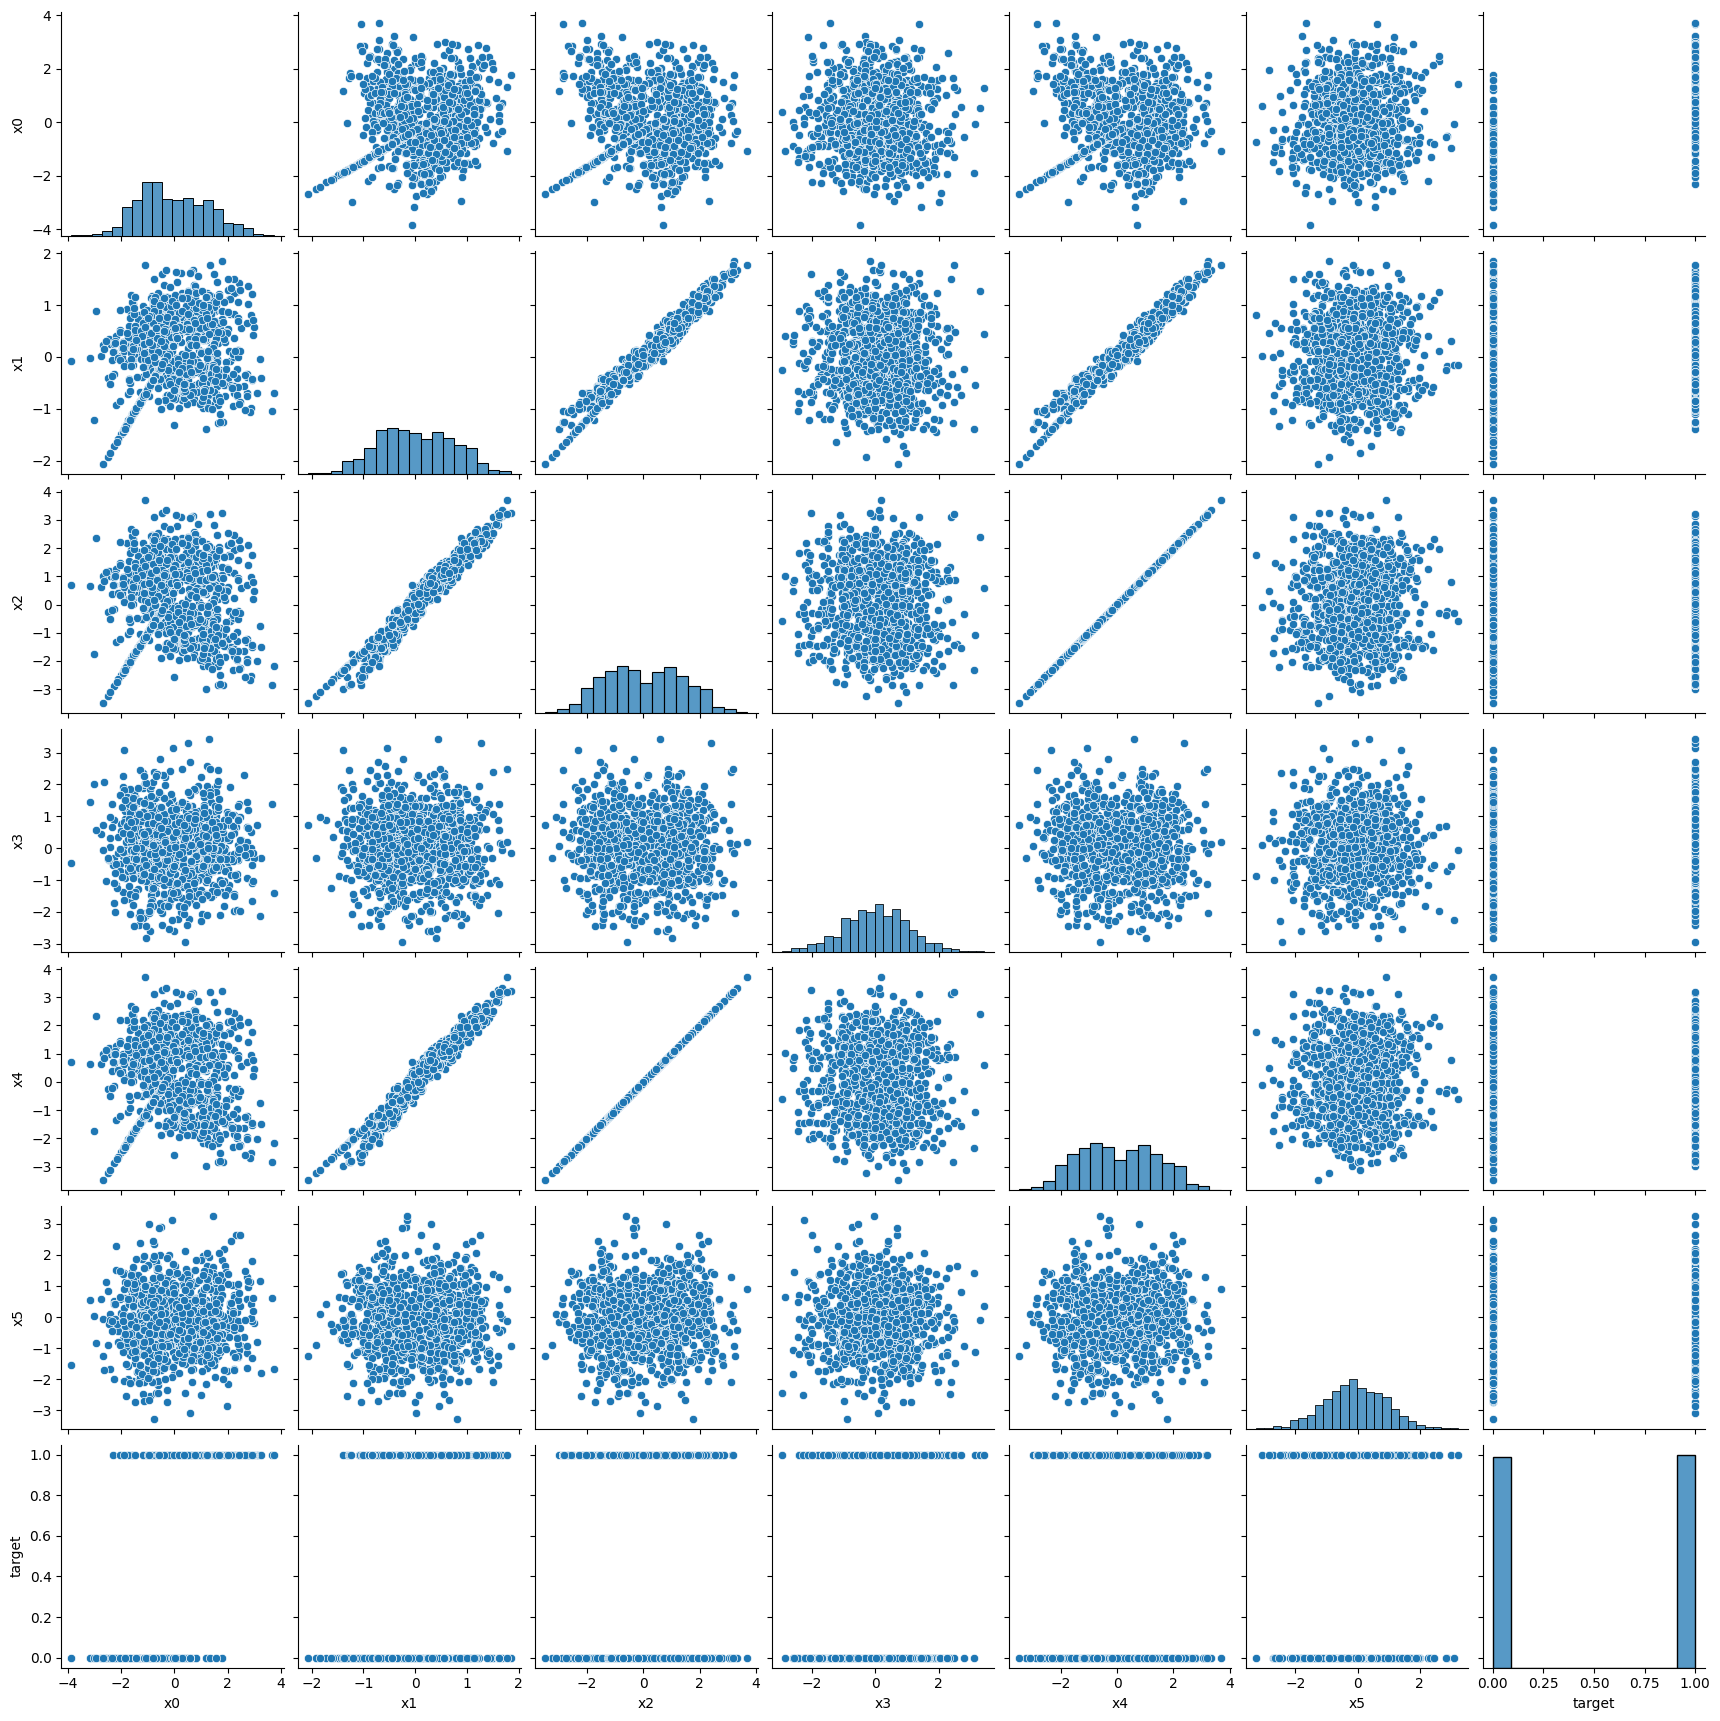

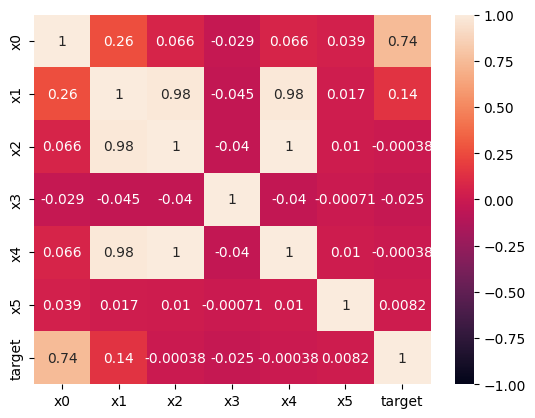

In [22]:
sns.pairplot(df)

correlation_df = df.corr()
plt.figure()
sns.heatmap(correlation_df, vmin=-1, vmax=1, annot=True);

По виду корреляционной матрицы совместным распределениям можно сказать, что часть признаков сильно корррелирует (или антикоррелирует) между собой.

Это поведение вполне очевидно, ведь для создания данных мы указали:
- `n_repeated=1` часть признаков повторяется
- `n_redundant=1` часть признаков является избыточной для описания данных

Избыточные признаки откидывают из анализа, корреляции между признаками стараются избегать. Их можно откинуть или же регуляризировать (об этом позже)

**Задание 1**. Попробуйте создать модель классификации методом kNN и обучить ее с коррелированными данными и без. Попробуйте проанализировать влияние коррелированных признаков на качество модели.

In [23]:
from itertools import combinations
kf = KFold(n_splits=5, random_state=None, shuffle=True)
y = df["target"].to_numpy()
cv1 = {}
for xi in combinations(("x0", "x1", "x2", "x3", "x4", "x5"), 2):
    X = np.array([df[xi[0]], df[xi[1]]]).T
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    accuracies_knn = []
    for n_neighbors in range(1, 10):
        model_knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric="euclidean")
        model_knn.fit(X_train, y_train)
        accuracies_knn.append(accuracy_score(model_knn.predict(X_test), y_test))
    model_cv = KNeighborsClassifier(n_neighbors=accuracies_knn.index(max(accuracies_knn)) + 1, metric="euclidean")
    cv_res = cross_validate(
        model_cv,
        X,
        y,
        scoring="accuracy",
        cv=kf,
    )
    cv1[xi[0]+xi[1]] = cv_res['test_score'].mean()
    print(f"Mean accuracy for features {xi[0]} and {xi[1]} = {round(cv_res['test_score'].mean(), 3)}")

Mean accuracy for features x0 and x1 = 0.886
Mean accuracy for features x0 and x2 = 0.888
Mean accuracy for features x0 and x3 = 0.865
Mean accuracy for features x0 and x4 = 0.882
Mean accuracy for features x0 and x5 = 0.871
Mean accuracy for features x1 and x2 = 0.877
Mean accuracy for features x1 and x3 = 0.553
Mean accuracy for features x1 and x4 = 0.872
Mean accuracy for features x1 and x5 = 0.559
Mean accuracy for features x2 and x3 = 0.528
Mean accuracy for features x2 and x4 = 0.508
Mean accuracy for features x2 and x5 = 0.529
Mean accuracy for features x3 and x4 = 0.516
Mean accuracy for features x3 and x5 = 0.485
Mean accuracy for features x4 and x5 = 0.511


Для улучшения обучения модели иногда приходится нормализовать признаки. Под этим имеют в виду процедуру приведения признаков к нормальному распределению
- Для каждого признака вычисляется среднее и вычитается из всех признаков одновременно
- После смещения признаки масшатабируются делением на разность максимального-минимального значения

Эту процедуру уже реализует класс `Normalizer`, но частично эту процедуру можно провести с помощью `MinMaxScaler`.

**Задание 3**. Реализуйте два различных подхода к препроцессингу признаков и обучите модель kNN снова. Как это отразиться использование трансформированных признаков на качестве модели?

In [24]:
from sklearn.preprocessing import MinMaxScaler, Normalizer
y = df["target"].to_numpy()
for scaler in (MinMaxScaler(), Normalizer()):
    for xi in combinations(("x0", "x1", "x2", "x3", "x4", "x5"), 2):
        X = np.array([df[xi[0]], df[xi[1]]]).T
        scaler.fit(X)
        Xscaled = scaler.transform(X)
        X_train, X_test, y_train, y_test = train_test_split(Xscaled, y, test_size=0.2, random_state=1)
        accuracies_knn = []
        for n_neighbors in range(1, 20):
            model_knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric="euclidean")
            model_knn.fit(Xscaled, y)
            accuracies_knn.append(accuracy_score(model_knn.predict(Xscaled), y))
        model_cv = KNeighborsClassifier(n_neighbors=accuracies_knn.index(max(accuracies_knn)) + 1, metric="euclidean")
        cv_res_scaled = cross_validate(
            model_cv,
            X,
            y,
            scoring="accuracy",
            cv=kf,
        )
        diff = round(cv_res_scaled['test_score'].mean() - cv1[xi[0]+xi[1]], 3)
        print(f"Mean accuracy for features {xi[0]} and {xi[1]} preprocessed by {scaler} = {round(cv_res_scaled['test_score'].mean(), 3)}", 
              f"(Better than unprocessed by {diff})" if diff >= 0 else f"(Worse than unprocessed by {-diff})")



Mean accuracy for features x0 and x1 preprocessed by MinMaxScaler() = 0.857 (Worse than unprocessed by 0.029)
Mean accuracy for features x0 and x2 preprocessed by MinMaxScaler() = 0.853 (Worse than unprocessed by 0.035)
Mean accuracy for features x0 and x3 preprocessed by MinMaxScaler() = 0.814 (Worse than unprocessed by 0.051)
Mean accuracy for features x0 and x4 preprocessed by MinMaxScaler() = 0.862 (Worse than unprocessed by 0.02)
Mean accuracy for features x0 and x5 preprocessed by MinMaxScaler() = 0.805 (Worse than unprocessed by 0.066)
Mean accuracy for features x1 and x2 preprocessed by MinMaxScaler() = 0.84 (Worse than unprocessed by 0.037)
Mean accuracy for features x1 and x3 preprocessed by MinMaxScaler() = 0.511 (Worse than unprocessed by 0.042)
Mean accuracy for features x1 and x4 preprocessed by MinMaxScaler() = 0.851 (Worse than unprocessed by 0.021)
Mean accuracy for features x1 and x5 preprocessed by MinMaxScaler() = 0.551 (Worse than unprocessed by 0.008)
Mean accurac

Перейдем к еще одному методу решения проблемы классификации

## Дерево решений

В программировании есть понятие дерева. Это структура, которая состоит из узлов. У узла может быть родитель и наследники. Если у узла нет родителя, то этот узел является корневым. Если у узла нет наследников, то этот узел является листом.

Среди деревьев выбеляют класс бинарных деревьев. Узлы таких деревьев содержат максимум двух наследников

В каждом узле дерева можно разместить условие на какой-нибудь признак. По проверке первого условия решается куда далее "направлять" признаки. Процесс длится до момента спуска в определенный лист. И уже по листу решается принадлежность набора признаков определенному классу.

![image]( 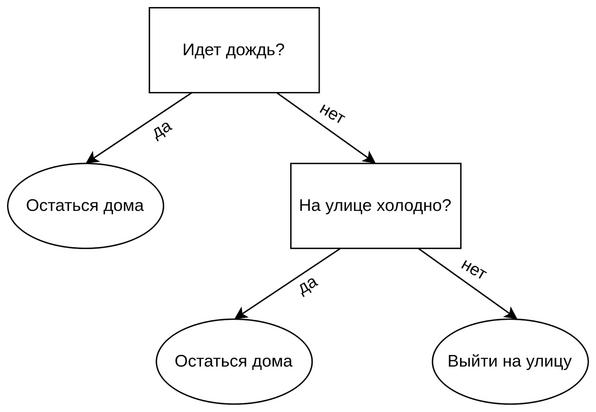)

Деревья могут использоваться и в задаче регрессии. В таком случае они подгоняют искомую зависимость кусочно-константной функцией.

![image]( 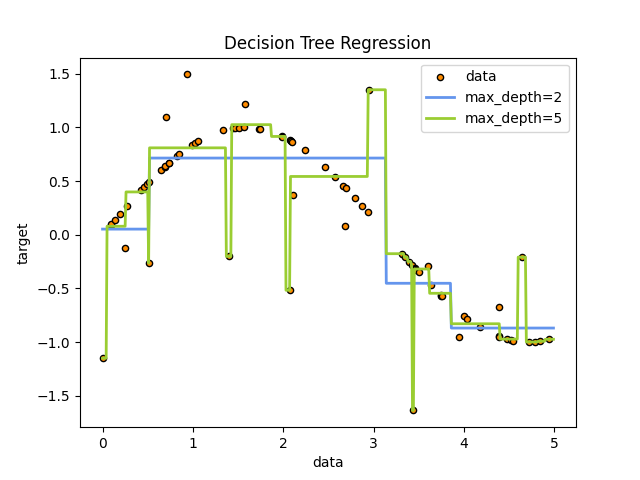)

Вся работа с деревьями содержиться в подмодуле `tree`

## Набор данных ирисы

Попробуем воспользоваться деревом решений для классификации объектов. В качестве данных возьмем `iris`:
- `sepal_length`: длина чашелистика
- `sepal_width`: ширина чашелистика
- `petal_length`: длина лепестка
- `petal_width`: ширина лепестка
- `species`: вид ириса

In [33]:
df = sns.load_dataset("iris")

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Отдельно выдилим названия признаков и целевого параметра 

In [34]:
feature_names = df.columns[:-1]
target_name = df.columns[-1]

Посмотрим на совместное распределение признаков

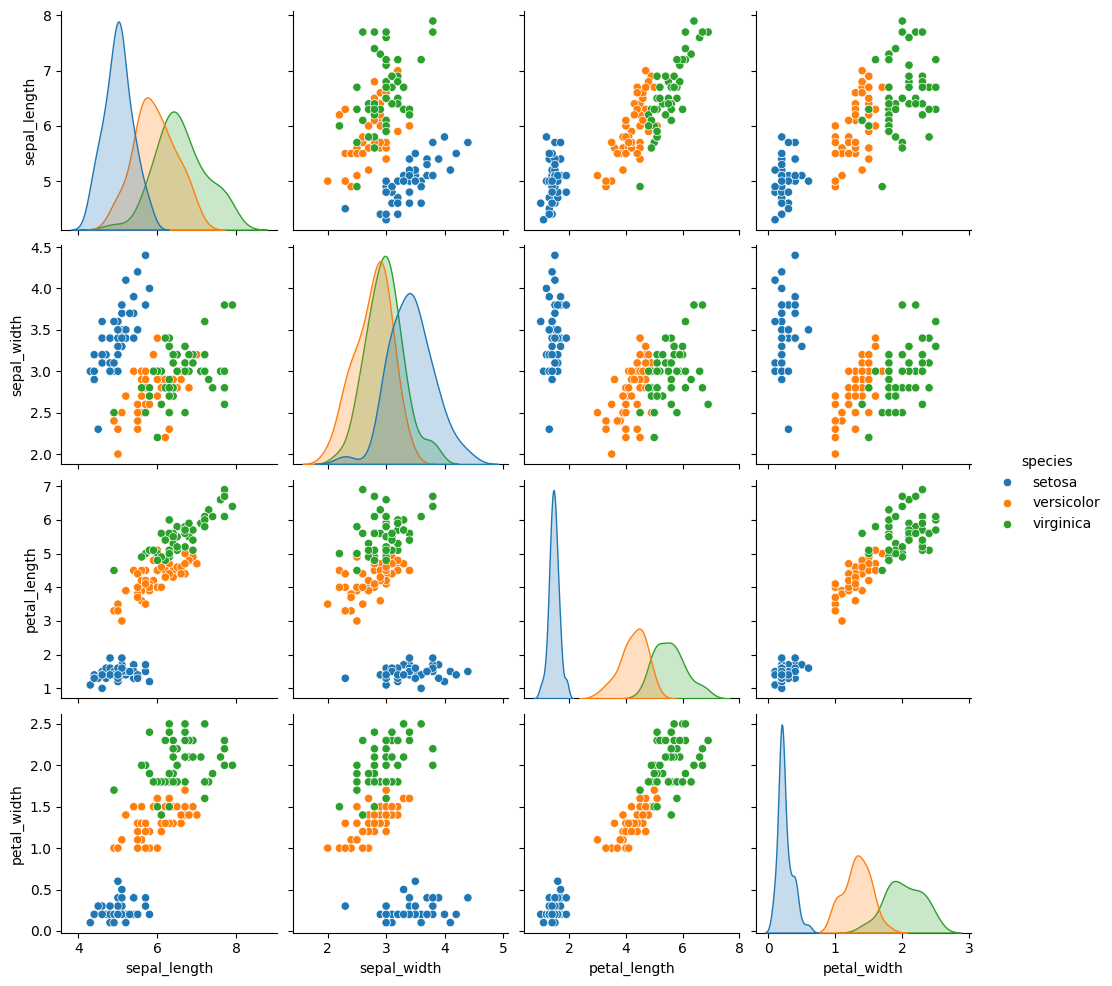

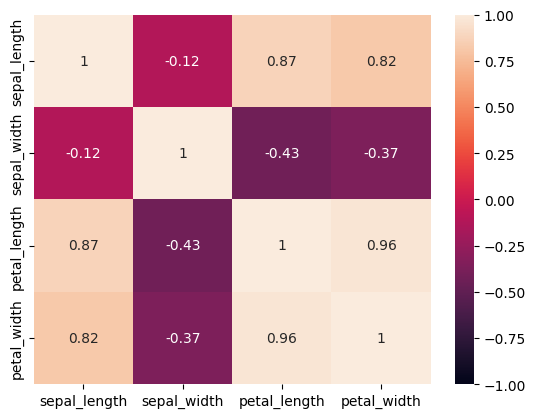

In [35]:
sns.pairplot(df, hue="species")

plt.figure()
correlation_df = df[feature_names].corr()
sns.heatmap(correlation_df, vmin=-1, vmax=1, annot=True);

Теперь мы готовы к построению модели

In [36]:
from sklearn import tree

model_tree = tree.DecisionTreeClassifier()

X = df[feature_names].to_numpy()
y = df[target_name].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model_tree.fit(X_train, y_train)

DecisionTreeClassifier()

Оценим качество модели

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(y_true=y_test, y_pred=model_tree.predict(X_test)))

confusion_matrix(y_test, model_tree.predict(X_test))

0.9666666666666667


array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

Дерево решений показывает отличный результат.

## Визуализация дерева решений

Давайте посмотрим на внутренность дерева. Дерево решений можно визуализировать в текстовом формате

In [38]:
print(tree.export_text(model_tree))

|--- feature_2 <= 2.60
|   |--- class: setosa
|--- feature_2 >  2.60
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: versicolor
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: virginica
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_1 <= 2.85
|   |   |   |   |   |--- class: versicolor
|   |   |   |   |--- feature_1 >  2.85
|   |   |   |   |   |--- class: virginica
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: versicolor
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: virginica



Деревья решений можно визуализировать в графическом формате

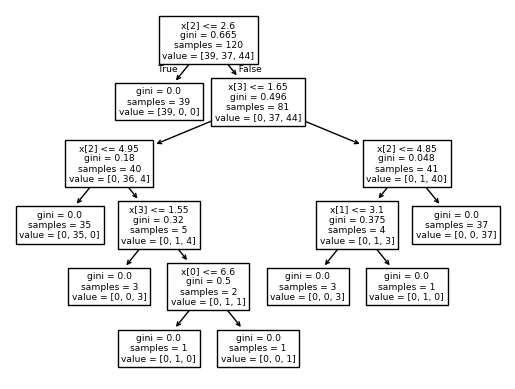

In [23]:
tree.plot_tree(model_tree);

Деревья решений легко переобучить. Например, если задать их слишком "глубокими"

In [24]:
model_tree = tree.DecisionTreeClassifier(max_features=1)
model_tree.fit(X_train, y_train)

accuracy_score(y_test, model_tree.predict(X_test)), confusion_matrix(y_test, model_tree.predict(X_test))

(0.9666666666666667,
 array([[11,  0,  0],
        [ 0, 12,  1],
        [ 0,  0,  6]]))

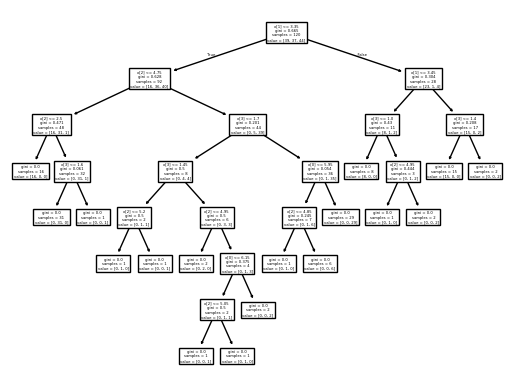

In [25]:
tree.plot_tree(model_tree);

Глубоким деревьям не доверяют. Они имеют потенциал к переобучению. Классическая глубина дерева решения составляет от 3 до 5 узлов

**Задание 2**. В качестве задачи на классификацию возьмем классический набор данных Титаника. Вам предоставляется информация о пассажирах затонувшего лайнера. Попробуйте определить влияние параметров на целевую метрику "survived".
- Определите наиболее влияющие параметры
- Воспользуйтесь алгоритмом дерева решений
- Заставьте дерево переобучиться
- Решите задачу методом kNN

In [ ]:
df = sns.load_dataset("titanic")

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [26]:
df = df.drop(columns=["embark_town", "who", "adult_male", "class", "alive", "alone", "deck"], errors="ignore")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


**Задание 3**. Проведите анализ набора данных `breast cancer`. Обучите модели kNN и дерева решений. Проанализируйте влияние признаков на качество моделей

In [28]:
from sklearn.datasets import load_breast_cancer
from typing import TYPE_CHECKING

if TYPE_CHECKING:
    from pandas import DataFrame

dataset = load_breast_cancer(as_frame=True)
df: DataFrame = dataset.frame

print(dataset.DESCR)

df.head()

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [43]:
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer(as_frame=True)
df: pd.DataFrame = dataset.frame

print(dataset.DESCR)

df.head()

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


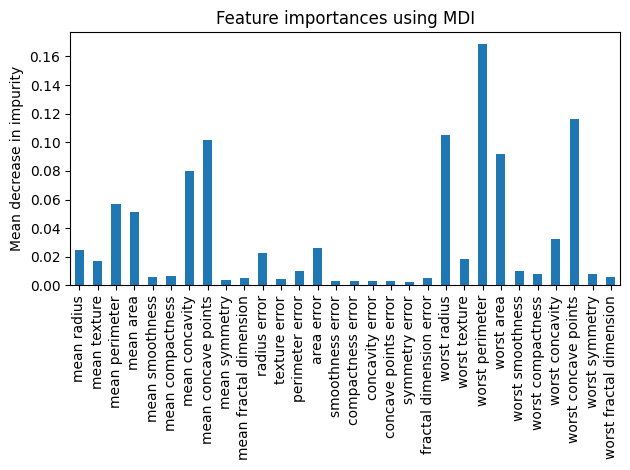

In [44]:
x = df.drop(columns=["target"])
y = df["target"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=0)
forest.fit(x_train, y_train)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=x.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [45]:
threshold = 0.05
x = df[[i for i in forest_importances.index if abs(forest_importances[i]) > threshold]]
y = df["target"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mean perimeter        569 non-null    float64
 1   mean area             569 non-null    float64
 2   mean concavity        569 non-null    float64
 3   mean concave points   569 non-null    float64
 4   worst radius          569 non-null    float64
 5   worst perimeter       569 non-null    float64
 6   worst area            569 non-null    float64
 7   worst concave points  569 non-null    float64
dtypes: float64(8)
memory usage: 35.7 KB


In [46]:
kf = KFold(n_splits=5, random_state=None, shuffle=True)
for metric in ("euclidean", "manhattan"):
    accuracies_knn = []
    for n_neighbors in range(1, 10):
        model_knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
        model_knn.fit(x_train, y_train)
        accuracies_knn.append(accuracy_score(model_knn.predict(x_test), y_test))
    model_cv = KNeighborsClassifier(n_neighbors=accuracies_knn.index(max(accuracies_knn)) + 1, metric=metric)
    cv_res = cross_validate(
        model_cv,
        x,
        y,
        scoring="accuracy",
        cv=kf,
    )
    print(f"Accuracy of kNN with {metric} metric = {cv_res['test_score'].mean()}")

Accuracy of kNN with euclidean metric = 0.9367489520260829
Accuracy of kNN with manhattan metric = 0.9332401800962584


In [47]:
model_tree = tree.DecisionTreeClassifier(max_depth=7)
model_tree.fit(x_train, y_train)
print(f"Depth: {model_tree.get_depth()}")
print(f"Accuracy of tree: {accuracy_score(y_test, model_tree.predict(x_test))}")

Depth: 7
Accuracy of tree: 0.9473684210526315
